In [ ]:
from model_tbyt_inference import GPT, GPTConfig
import torch
import os
itr_num = 60000
#block_size = 8
#vocab_size = 128
block_size = 32
vocab_size = 128
device = 'cpu'
config = GPTConfig(block_size=block_size, vocab_size=vocab_size)
model = GPT(config)

# model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/dec27_tbyt_n_embd:64_1head_layers:2_vocab_size:{vocab_size}_itr:{itr_num}_checkpoint.pt'), map_location=device)['model']


# model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/dec29-embedsize/dec29_tbyt_without-pos-embedding_n_embd:8_head:1_layers:2_vocab_size:128_itr:{itr_num}_checkpoint.pt'), map_location=device)['model']
# more than 1 head
model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/dec29-embedsize/dec29_tbyt_without-pos-embedding_n_embd:8_head:2_layers:2_vocab_size:128_itr:{itr_num}_checkpoint.pt'), map_location=device)['model']
# add pos emb
# model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/dec29-embedsize/dec29_tbyt_with-pos-embedding_n_embd:8_head:1_layers:2_vocab_size:128_itr:{itr_num}_checkpoint.pt'), map_location=device)['model']


#model_state_dict = torch.load('./saved_models/tbyt_b64_v2048_embd16_1head_2_itr:20000_checkpoint.pt', map_location=device)['model']
model.load_state_dict(model_state_dict)
model.to(device=device)

bias diag is  tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
bias diag is  tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
i initialized transformer
I have initialized all the variables in GPT instructor


GPT(
  (transformer): ModuleDict(
    (wte): Embedding(129, 8)
    (wpe): Embedding(129, 8)
    (h): ModuleList(
      (0-1): 2 x Block(
        (c_attn): CasualSelfAttention(
          (c_attn): Linear(in_features=8, out_features=24, bias=True)
          (c_proj): Linear(in_features=8, out_features=8, bias=True)
        )
        (c_fc): MLP(
          (fc_1): Linear(in_features=8, out_features=24, bias=True)
          (gelu): GELU(approximate='tanh')
          (fc_2): Linear(in_features=24, out_features=8, bias=True)
        )
        (ln_1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
        (ln_2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_f): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=8, out_features=128, bias=False)
)

In [2]:
batch_size = 1
#test_1_seq = torch.cat((torch.arange(110, 30, -5) , torch.arange(127, 111, -1)), dim=0) 
#print(test_1_seq)
def get_batch(changing_num=-1, changing_index=-1, initial_sequence=None, batch_size=batch_size):
   def cat_sorted_tensor(x):
      if initial_sequence is not None:
         x = initial_sequence
      else:
         x = x
         #x, _ = torch.sort(x, descending=True)
      if changing_num != -1:
         if changing_index == -1:
            x[0] = changing_num
         else:
            x[changing_index] = changing_num
      #x = torch.cat((torch.tensor([100]).repeat(16), torch.tensor([1]).repeat(16)))
      #x = torch.tensor([100,100,100,100,1,1,1,1])
      vals, _ = torch.sort(x)
      #vals2, _ = torch.sort(x, descending=True)
      #print('vals are ', vals)
      return torch.cat((x, torch.tensor([vocab_size]), vals), dim=0)
   #x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:block_size]) for _ in range(batch_size)])
   x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:32]) for _ in range(batch_size)])
   return x

In [3]:

##just testing the output
idx = get_batch()
if not torch.any(idx[0,] == 12):
    idx[0,0] = 12
if not torch.any(idx[0,] == 13):
    idx[0,1] = 13
if not torch.any(idx[0,] == 14):
    idx[0,2] = 14
idx = get_batch(initial_sequence=idx[0,:32])

#idx[0,43] = 50
#idx[0,44] = 110
#x, _ = torch.sort(x[0])
#x = torch.unsqueeze(x, dim=0)
idx


tensor([[ 12,  13,  81,  15,  46,  14,  74,  72,  36, 120,  25,  75,  51,  95,
          90,   4,  45,  54,  91,  37,  99, 114,  79,  60,  67,  48, 125, 102,
         100,  58, 107,  71, 128,   4,  12,  13,  14,  15,  25,  36,  37,  45,
          46,  48,  51,  54,  58,  60,  67,  71,  72,  74,  75,  79,  81,  90,
          91,  95,  99, 100, 102, 107, 114, 120, 125]])

x shape is  torch.Size([1, 65, 8])
attn dim is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 8])
attn dim is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 8])
attn dim is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 8])
attn dim is  torch.Size([1, 1, 65, 65])
loss is  2.5103838443756104
idx is: tensor([[ 12,  13,  81,  15,  46,  14,  74,  72,  36, 120,  25,  75,  51,  95,
          90,   4,  45,  54,  91,  37,  99, 114,  79,  60,  67,  48, 125, 102,
         100,  58, 107,  71, 128,   4,  12,  13,  14,  15,  25,  36,  37,  45,
          46,  48,  51,  54,  58,  60,  67,  71,  72,  74,  75,  79,  81,  90,
          91,  95,  99, 100, 102, 107, 114, 120, 125]])
result is: tensor([[ 10,  10,  82,  13,  57,  11,  76,  74,  42, 123,  29,  77,  56, 114,
          93,   7,  56,  59,  94,  41, 112, 117,  81,  64,  71,  53, 127, 111,
         101,  62, 110,  74,   5,   7,  16,  21,  18,  19,  29,  41,  41,  47,
          48,  52,  55,  58,  63,  64,  71, 

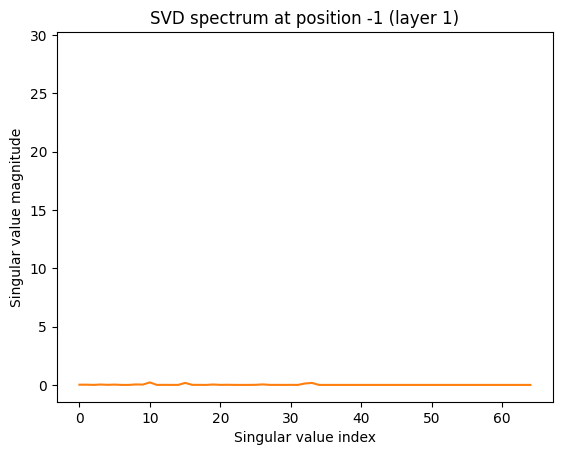

In [4]:
#idx[0,19] = 10
#idx[0,36] = 10
#idx[0,20] = 11
#idx[0,37] = 11
import matplotlib.pyplot as plt
logits, loss = model(idx)
#logits, loss = model.without_pos_embd(idx)
print('loss is ', loss.item())
print(f'idx is: {idx}')
print(f'result is: {torch.argmax(logits, dim=-1)}')

In [ ]:
## manually calculating the layer norms!!

B, T = idx.size()
pos = model.transformer.wpe(torch.arange(T).to(device))
x = model.transformer.wte(idx) + pos
y = model.transformer.h[0](x)
print('y is ', y)
x0 = x
x = x - model.means[0, :, :]
x = x / model.norms[0, :, :]
x = x * model.transformer.h[0].ln_1.weight + model.transformer.h[0].ln_1.bias
x = x0 + model.transformer.h[0].c_attn(x, 0)
## now MLP
x1 = x
x = x - model.transformer.h[0].meanval
x = x / model.transformer.h[0].normval
x = x * model.transformer.h[0].ln_2.weight + model.transformer.h[0].ln_2.bias
x = x1 + model.transformer.h[0].c_fc(x)
print('second x is ', x)

In [5]:
qweights, kweights, vweights = model.transformer.h[0].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)
model.transformer.wte.weight.shape

torch.Size([129, 8])

In [ ]:
## taking the SVD decomposition of wpe matrix

#tmp1 = model.transformer.wpe.weight / torch.norm(model.transformer.wpe.weight, dim=1).view(model.transformer.wpe.weight.size(0), 1)
#print(torch.norm(tmp1[14,:] - tmp1[8,:]))
print(torch.norm(model.transformer.wpe.weight[34,:]))
#S, V, D = torch.linalg.svd(model.transformer.wpe.weight[:32,:])
#plt.plot(V.detach().numpy())

tensor(0.2633, grad_fn=<LinalgVectorNormBackward0>)


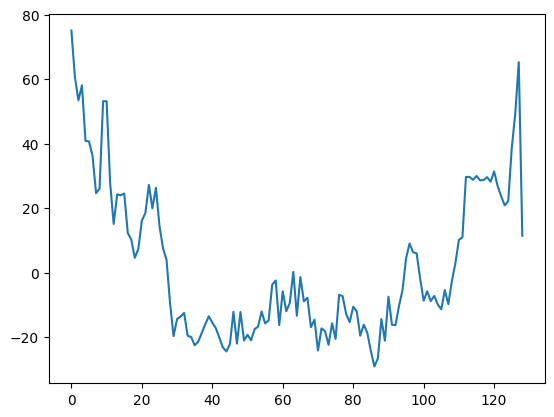

In [ ]:
import matplotlib.pyplot as plt
scores = torch.tensor([1.2080e-04, 1.7336e-04, 6.1379e-06, 4.1702e-06, 6.2350e-06,
          3.9002e-05, 9.7805e-04, 4.6728e-03, 2.4274e-03, 1.5666e-04,
          1.2279e-04, 9.1291e-05, 2.2003e-04, 5.0898e-03, 5.5059e-05,
          4.3777e-04, 3.1849e-04, 5.7809e-07, 6.8402e-08, 2.0084e-08,
          1.1515e-10, 7.5004e-12, 3.9885e-12, 2.5423e-12, 8.1654e-09,
          3.8446e-06, 2.8228e-02, 3.9749e-02, 6.0743e-02, 9.3823e-02,
          4.9410e-01, 2.2653e-01, 1.7915e-02, 2.3985e-02, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]).unsqueeze(-1)
#print('scores sum ', scores.sum(dim=0))
T = 65
#print((scores * model.transformer.h[0].ln_1(model.transformer.wte(idx))).shape)
#y = model.transformer.h[0].c_attn.c_proj(vweights @ ((scores * (model.transformer.h[0].ln_1(model.transformer.wte(idx[0,:]) + model.transformer.wpe(torch.arange(T))))).sum(dim=0)))
y = model.transformer.h[0].c_attn.c_proj(vweights @ model.transformer.h[0].ln_1(model.transformer.wte(idx[0,46]) - 0.6*model.transformer.wpe.weight[32,:]))
z = y + model.transformer.wte(idx[0,46]) - 0.6* model.transformer.wpe.weight[32,:]
#plt.plot((model.transformer.wte.weight @ z).detach().numpy())
plt.plot((model.transformer.wte.weight @ (z + model.transformer.h[0].c_fc(model.transformer.h[0].ln_2(z)))).detach().numpy())
plt.xlabel("Vocabulary index")
plt.ylabel("Logit / unnormalized score")
plt.title("LM head scores from (z + MLP(ln2(z))) at token position 46")
#plt.plot((model.transformer.wte.weight @ vweights @ model.transformer.h[0].ln_1(model.transformer.wpe.weight[32,:])).detach().numpy())

(129, 129)


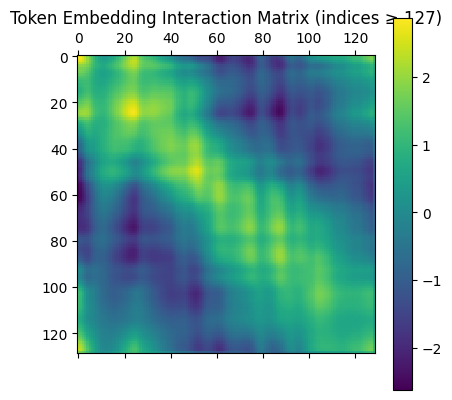

scores  [ 0.7264694   0.80389935  0.89730436  0.9845406   1.0715642   1.1495508
  1.2324187   1.3224392   1.4130677   1.4975089   1.5617228   1.5961617
  1.6053318   1.552743    1.4005365   1.2463403   1.1728251   1.1535962
  1.1710142   1.200344    1.2201602   1.219783    1.2013425   1.1812781
  1.1510503   1.1296133   1.104368    1.080749    1.0641233   0.98171675
  0.85909146  0.7340886   0.6613458   0.6041304   0.56120735  0.60377026
  0.66648275  0.6640649   0.6203074   0.54355484  0.44416964  0.311463
  0.1813482   0.05059864 -0.08662692 -0.22085385 -0.33912244 -0.4750789
 -0.6035134  -0.67937773 -0.7305004  -0.75127506 -0.7505196  -0.74380594
 -0.7550115  -0.7712838  -0.8182306  -0.8891618  -0.9647076  -1.0480373
 -1.1364678  -1.2313102  -1.2838616  -1.2703146  -1.2003745  -1.0765418
 -0.93602264 -0.8369321  -0.81646097 -0.87388575 -0.97631276 -1.0969235
 -1.2230368  -1.3135232  -1.443483   -1.4951893  -1.4706241  -1.3515221
 -1.1853316  -1.0390422  -0.939461   -0.8991325  -0.93

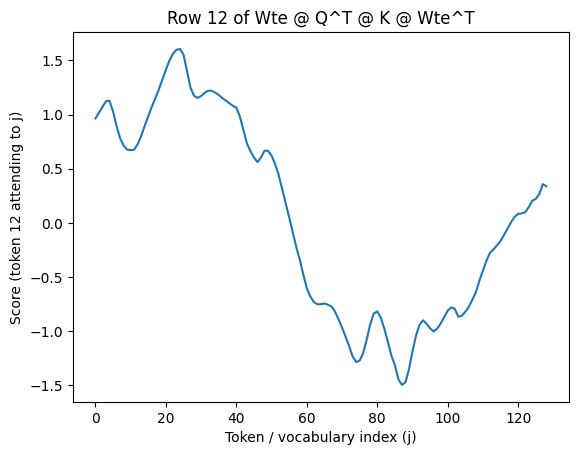

In [ ]:
import torch.nn.functional as F
#scores = (F.normalize(model.transformer.wpe.weight @  qweights.t(), p=2, dim=1) @ F.normalize(qweights @ model.transformer.wpe.weight.t(), p=2, dim=0)).detach().numpy()
scores = ((model.transformer.wte.weight @  qweights.t()) / torch.norm((model.transformer.wte.weight + model.transformer.wpe.weight), dim=1).view(model.transformer.wpe.weight.size(0), 1) 
          @ kweights @ model.transformer.wte.weight.t() / torch.norm((model.transformer.wpe.weight + model.transformer.wte.weight), dim=1).view(1, model.transformer.wpe.weight.size(0))).detach().numpy()

import numpy as np
U, S, Vh = np.linalg.svd(scores)
#plt.plot(S[:])

scores = (model.transformer.wte.weight @  qweights.t() @ kweights @ model.transformer.wte.weight.t()).detach().numpy()
import matplotlib.pyplot as plt
print(scores.shape)
plt.matshow(scores) # [127:,127:]
plt.title("Token Embedding Interaction Matrix")
plt.colorbar()
plt.show()



row = 12
plt.plot(scores[row, :])
plt.xlabel("Token / vocabulary index (j)")
plt.ylabel(f"Score (token {row} attending to j)")
plt.title(f"Row {row} of Wte @ Q^T @ K @ Wte^T")
print('scores ', scores[12, 12:])

In [8]:
torch.norm(model.transformer.wpe.weight / (torch.norm(model.transformer.wpe.weight + model.transformer.wte.weight, dim=1)).view(model.transformer.wpe.weight.size(0),1),dim=1).detach().numpy()

array([0.09380595, 0.1175398 , 0.1111477 , 0.11072489, 0.12972789,
       0.14281744, 0.14264655, 0.14315976, 0.15983695, 0.1273104 ,
       0.11826848, 0.11001614, 0.11493754, 0.13890882, 0.1069848 ,
       0.13382465, 0.12466118, 0.16113156, 0.16665271, 0.15363413,
       0.14333148, 0.145072  , 0.1630689 , 0.13488898, 0.13205463,
       0.14375505, 0.14190345, 0.16853623, 0.14609438, 0.155492  ,
       0.13639732, 0.13969693, 0.9229926 , 0.6360636 , 0.57455945,
       0.5410947 , 0.49532947, 0.482621  , 0.49725154, 0.48084083,
       0.45793873, 0.44308767, 0.4457935 , 0.46445963, 0.47107413,
       0.45597824, 0.43937048, 0.48023117, 0.46124333, 0.4655326 ,
       0.46210358, 0.45475888, 0.45237532, 0.4634895 , 0.4588894 ,
       0.46559435, 0.46316785, 0.4861825 , 0.5009505 , 0.55047524,
       0.55729973, 0.63471705, 0.73984474, 0.8540314 , 0.3446905 ,
       0.33390966, 0.3593928 , 0.3675981 , 0.37349707, 0.33640704,
       0.38013622, 0.33328533, 0.33377105, 0.28571755, 0.32462

In [ ]:
## print PE norms
import matplotlib.pyplot as plt
plt.plot(torch.norm(model.transformer.wpe.weight @ qweights.t() / torch.norm((model.transformer.wpe.weight + model.transformer.wte.weight), dim=1).view(model.transformer.wpe.weight.size(0), 1), dim=1).detach().numpy()[33:64])
plt.xlabel("Position index (33..63)")
plt.ylabel("Normalized ||wpe[pos] @ qweights^T||")
plt.title("Positional embedding projection norms (slice 33:64)")

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
          0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
          0.0613, 0.0611, 0.0612, 0.0611, 0.0612, 0.0617, 0.0610, 0.0612,
          0.0612, 0.0612, 0.0612, 0.0611, 0.0612, 0.0612, 0.0612, 0.0612,
          0.0064, 0.0103, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000]]], grad_fn=<SliceBackward0>)
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
          0.0003, 0.0003,

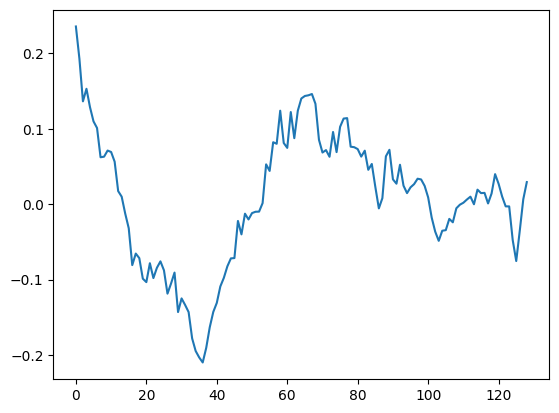

In [ ]:
## obtaining weights of second layer
qweights2, kweights2, vweights2 = model.transformer.h[1].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)

#half_res_stream_tmp = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wpe.weight.unsqueeze(0)))[0,...]
half_res_stream = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))[0,...]
res_stream_1_without_residual = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
#res_stream_1_without_residual = model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device)))
res_stream_1 = (model.transformer.h[0](model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
res_stream_1 = res_stream_1[0,...]
res_stream_2 = model.transformer.h[1](res_stream_1.unsqueeze(0))[0,...]
#scores = (res_stream_1 @  qweights.t() @ qweights @ res_stream_1.t()).detach().numpy()
## assuming almost orthogonality

#scores = (half_res_stream @ vweights @ model.transformer.wpe.weight.t()).detach().numpy()

#scores2 = (model.transformer.wte.weight @ half_res_stream_tmp.t()).detach().numpy()
scores3 = (res_stream_1 @ qweights2.t() @ kweights2 @ model.transformer.wte.weight.t()).detach().numpy()
word_indices = (res_stream_1_without_residual @ model.transformer.wte.weight.t()).detach().numpy()
#plt.matshow(word_indices)
#plt.plot(word_indices[41,:])

import matplotlib.pyplot as plt
#plt.matshow(scores[:, :])
#plt.plot(-scores[:,32] * 400.0)
#plt.plot(scores2[:,32] / (torch.norm(vweights @ model.transformer.wpe.weight[32,:]).detach().numpy() ** 2))
#plt.plot(scores2[:,32] / (torch.norm(model.transformer.wte.weight[32,:]).detach().numpy() ** 2))
print(word_indices.shape)
plt.plot(word_indices[0,60,:])
plt.xlabel("Vocabulary index")
plt.ylabel("Logit / similarity score")
plt.title("word_indices at batch=0, position=60 (projection onto vocab)")

#plt.colorbar()
plt.show()
#plt.plot(scores[22, :])

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[0.0476, 0.0455, 0.0466, 0.0470, 0.0475, 0.0476, 0.0472, 0.0467,
          0.0469, 0.0472, 0.0473, 0.0468, 0.0471, 0.0476, 0.0460, 0.0474,
          0.0137, 0.0137, 0.0137, 0.0136, 0.0135, 0.0135, 0.0135, 0.0133,
          0.0133, 0.0134, 0.0133, 0.0136, 0.0135, 0.0132, 0.0134, 0.0133,
          0.0198, 0.0131, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000]]], grad_fn=<SliceBackward0>)
norm without residual  tensor(91.4112, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(4.1166, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias i

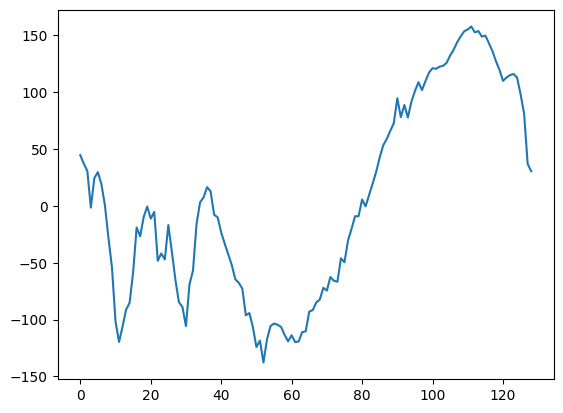

In [ ]:
## feeding directly to second layer
word_proj = model.lm_head(model.transformer.h[1](model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
plt.plot(word_proj[0, 34, :].detach().numpy())
plt.xlabel("Vocabulary index")
plt.ylabel("Logit (lm_head output)")
plt.title("LM head output at position 34")

In [20]:
hidden_projections = model.proj_on_embedding(idx, index=9)

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])


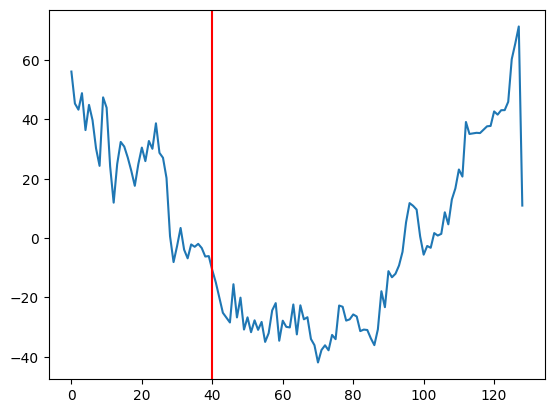

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(vocab_size + 1), hidden_projections[0, 1, :])
plt.xlabel("Vocabulary index")
plt.ylabel("Hidden projection value")
plt.title("hidden_projections[0, 1, :] vs vocabulary index")
plt.axvline(x = 40.0, color='r')

In [50]:
proj_max_results = []
for layer in range(config.n_layers + 1):
    proj_max_result = []
    for index in range(config.block_size * 2 + 1):
        hidden_projections = model.proj_on_embedding(idx, index=index)
        proj_max_result.append(torch.argmax(hidden_projections[0, layer, :]).item())
    if layer > 0:
        proj_max_results.append([-1, *proj_max_result])
    else:
        proj_max_results.append([*proj_max_result, -1])
proj_max_results = torch.tensor(proj_max_results)


x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[1.8483e-01, 3.3997e-01, 2.4124e-01, 7.7809e-02, 5.0177e-02,
          3.5983e-02, 6.8439e-03, 8.0768e-04, 4.1406e-06, 7.1283e-07,
          7.0839e-09, 2.8695e-11, 3.8828e-12, 2.9385e-12, 1.4384e-11,
          2.9699e-11, 2.3959e-10, 8.0650e-09, 1.2794e-07, 2.5825e-04,
          2.6790e-05, 3.6659e-03, 7.4352e-04, 4.5857e-05, 8.9734e-04,
          2.5029e-03, 2.2811e-03, 6.6863e-05, 4.1267e-06, 2.9747e-04,
          1.0542e-03, 1.7331e-04, 1.9352e-02, 3.0967e-02, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e

In [51]:
proj_max_results

tensor([[  1,   2,   4,  10,  11,  12,  14,  16,  21,  23,  28,  36,  38,  46,
          48,  49,  54,  57,  59,  69,  72,  80,  83,  87,  91,  93,  99, 105,
         108, 116, 123, 125, 128,   0,   2,   4,  10,  11,  12,  14,  16,  21,
          23,  28,  36,  38,  46,  48,  49,  54,  57,  59,  69,  72,  80,  83,
          87,  91,  93,  99, 105, 108, 115, 123, 125,  -1],
        [ -1,   0,   0,   0,  10,  10,  10,   3,  11, 127, 127,  12,  16,  15,
          46, 127, 127, 127, 127, 127,  10,  10,   3,  11,  11,  12,   3,  12,
          11,  14,   0, 127, 127,   0,   0,   3,  10,  11,  11,  11,  14, 126,
          14,  14,  30,  31,  46,  46,  46,  46,  54,  56,  56,  71,  76,  84,
          75,  88,  84,   0,  97,  88, 124, 125, 127, 127],
        [ -1,   1,   2,   2,   9,   9,   9,   9,  16,   9,  15,  15,  26,  25,
          43,  45,  45,  49,  49,  10,  11,  12,   3,   3,  79,   3,   7,   7,
           7,   7, 121, 123, 125,   1,   2,   4,   9,  11,  12,  14,  16,  21,
          2

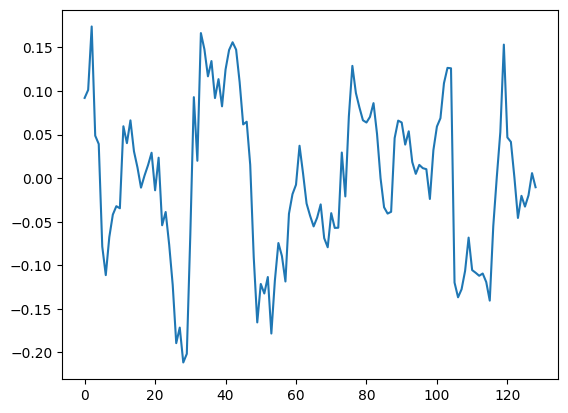

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
m = (model.transformer.wte.weight @ model.transformer.wte.weight.transpose(0,1)).detach().numpy()
eigs, eigvecs = np.linalg.eig(m)
plt.plot(eigvecs[:,5])
plt.xlabel("Vocabulary index")
plt.ylabel("Eigenvector component value")
plt.title("Eigenvector 5 of (Wte @ Wte^T)")
#plt.plot(m[91,:])

In [98]:
model.state_dict().keys()

odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.c_attn.bias', 'transformer.h.0.c_attn.c_attn.weight', 'transformer.h.0.c_attn.c_attn.bias', 'transformer.h.0.c_attn.c_proj.weight', 'transformer.h.0.c_attn.c_proj.bias', 'transformer.h.0.c_fc.fc_1.weight', 'transformer.h.0.c_fc.fc_1.bias', 'transformer.h.0.c_fc.fc_2.weight', 'transformer.h.0.c_fc.fc_2.bias', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.1.c_attn.bias', 'transformer.h.1.c_attn.c_attn.weight', 'transformer.h.1.c_attn.c_attn.bias', 'transformer.h.1.c_attn.c_proj.weight', 'transformer.h.1.c_attn.c_proj.bias', 'transformer.h.1.c_fc.fc_1.weight', 'transformer.h.1.c_fc.fc_1.bias', 'transformer.h.1.c_fc.fc_2.weight', 'transformer.h.1.c_fc.fc_2.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.2.c_attn.bias', 'transforme

In [114]:
model.transformer.h[0].c_attn.c_attn.weight.detach().numpy().shape
#eigvecs[:,0].shape

(192, 64)

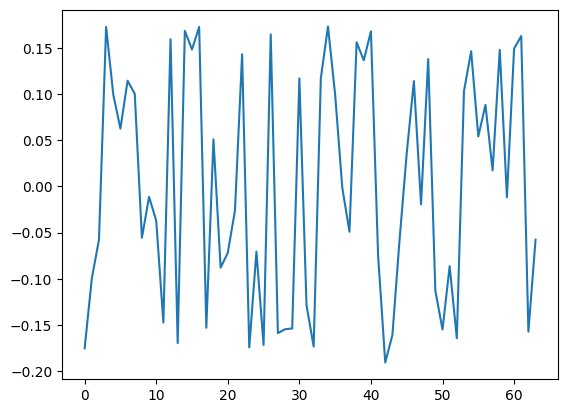

In [ ]:
m = (model.transformer.wte.weight.transpose(0,1) @ model.transformer.wte.weight).detach().numpy()
eigs2, eigvecs2 = np.linalg.eig(m)

plt.plot(eigvecs2[:, 1])
plt.xlabel("Embedding dimension index")
plt.ylabel("Eigenvector component value")
plt.title("Eigenvector 1 of (Wte^T @ Wte)")

In [ ]:
plt.plot(model.lm_head(np.matmul(model.transformer.h[0].c_attn.c_attn.weight.detach().numpy(), eigvecs2[:,0])[:64]))